# Convective Equation (Transport Equation)

The convective equation also known as transport equation is a partial diferential equation (PDE) usually described by

$$
\partial_t u + \partial_{\alpha}B_{\alpha}  = 0
$$(cv-eq-lb)

where $u(\alpha,t)$ is a time and space dependent parameter that is being transporte and $B_{\alpha}(\alpha,t)$ is a second time and space dependent parameter that can also be depende of $u(\alpha,t)$ in non-linear convective diffusive equations. 

## Numerical Discretization

Discretizing the above equation in regular grid of 1D domain, we have

```{figure} mesh-1-convective.svg
---
scale: 250%
align: center
name: mesh-1-convective
---
1D regular grid.
```

### FDM Discretization

The Discretization through finite difference method can assume distinct forms that describe the problem with different accuracy, rate convergence and stability. In the sequence of this section, we will explore different variation that can work with the convective formulation.

#### Forward-Time and Forward-Space (FTFS)
Discretizing the Eq. {eq}`cv-eq-lb` through finite diference method, we have for forward-time and forward-space (FTFS) discretizations:

$$
\partial_t u + \partial_{x}B_{\alpha}  = \frac{u(x,t + \Delta_{t}) - u(x,t) }{\Delta_{t}} + \frac{B_{\alpha}(x,t) - B_{\alpha}(x + \Delta_{x},t) }{\Delta_{x}} =0,
$$

isolating the term $u(x,t + \Delta_{t})$, we can describe the $u$ time evolution:

$$
u(x,t + \Delta_{t})   = u(x,t) - \frac{\Delta_{t}}{\Delta_{x}} \left( B_{\alpha}(x,t) - B_{\alpha}(x + \Delta_{x},t) \right) .
$$

#### Forward-Time and Central-Space with Small Diffusivity (FTCS-SD)

Give that discretize convective equation with pure forwar-time and central-space (FTCS) can be unstable for several cases, employ a forwar-time and central-space with small diffusivity (FTCS-SD) is a alternative to improve stability and ensure a propertie conservation.

$$
\partial_t u + \partial_{x}B_{\alpha} + \partial_{\alpha}\left( \nu \partial_{\alpha}u \right) = \frac{u(x,t + \Delta_{t}) - u(x,t) }{\Delta_{t}} + \frac{B_{\alpha}(x,t) - B_{\alpha}(x + \Delta_{x},t) }{\Delta_{x}} + \nu\frac{ u(x - \Delta_{x},t) -2u(x,t) + u(x + \Delta_{x},t) }{\Delta_{x}^{2}} =0,
$$

isolating the term $u(x,t + \Delta_{t})$, we can describe the $u$ time evolution:

$$
u(x,t + \Delta_{t})   = u(x,t) - \frac{\Delta_{t}}{\Delta_{x}} \left( B_{\alpha}(x,t) - B_{\alpha}(x + \Delta_{x},t) \right) - \frac{\nu\Delta_{t}}{\Delta_{x}^{2}} \left( u(x - \Delta_{x},t) -2u(x,t) + u(x + \Delta_{x},t) \right) .
$$

### Lattice Boltzmann Equation

Describing the problem through the BGK lattice Boltzmann equation, we assume a equilibrium state for the present problem, where $ f_{i}= f_{i}^{eq}$ and the BGK lattice Boltzmann equation reduces to:

$$
f_{i}\left(\boldsymbol{x}+\boldsymbol{e}_i \Delta t, t+\Delta t\right)- f_{i}(\boldsymbol{x}, t)= -\left( \frac{ f_{i} - f_{i}^{eq} }{ \tau } \right) \quad \quad \rightarrow \quad \quad f_i( x_{\alpha} + e_{i,\alpha} \delta t, t+\delta t) = f_{i}^{eq} , 
$$(LB-cv-Eq)

where the equilibrium distribution function is defined by

$$
f^{eq}_{i} = w_{i}\left( u + \frac{e_{i,\alpha} B_{\alpha}}{c_{s}^{2}} \right),
$$

<!-- and the equilibrium moments are given by 

$$
\displaystyle\sum_{i=0} f_{i}^{eq}=\phi, \quad \quad  \displaystyle\sum_{i}f_{i}^{eq} e_{i,\alpha} =0 \quad \quad \textrm{and} \quad \quad  \displaystyle\sum_{i}f_{i}^{eq} e_{i,\alpha} e_{i,\beta} =c_{s}^{2} \phi \delta_{\alpha\beta}.
$$(moments-fi-df)

Through Chapman–Enskog analysis, it is demonstrated that the first-order non-equilibrium moment describes the pressure gradient and, consequently, the average velocity:

$$
m^{neq}_{\alpha} = \displaystyle\sum_{i} e_{i,\alpha}\left( f_i-f_i^{eq}\right)  = -(c_{s}^{2} \tau \delta_{t})\partial_{\alpha}\phi  \quad \quad \textrm{and} \quad\quad \tau = \displaystyle\frac{\nu}{c_{s}^{2} \delta_{t}} +\frac{1}{2}.
$$ -->

#### Lattice Direction Moments

In [23]:
import warnings
warnings.filterwarnings("ignore")
from pylab import *
from __future__ import division
from sympy import *
import numpy as np
from sympy import S, collect, expand, factor, Wild
from sympy import fraction, Rational, Symbol
from sympy import symbols, sqrt, Rational
import sympy as sp
from IPython.display import display, Math, Latex
#-------------------------------------------------Símbolos----------------------------------------------
omega, u, B, w = symbols('omega, u, B_{\\alpha}, w')
wi, cx, cy, cs = symbols('w_{i} c_{x} c_{y} c_{s}')
fi, f0, f1, f2  = symbols('f_{i} f_{0} f_{1} f_{2}')
#-------------------------------------------------Funções----------------------------------------------
feq = Function('feq')(wi, cx, cy)
fneq = Function('fneq')(wi, cx, cy)
f = Function('f')(fi)
#----------------------------------------------Lattice-D2Q9---Variáveis----------------------------------------------
fi=np.array([f0,f1,f2])
w0=Rational(4,6);w1=Rational(1,6)
wi=np.array([w0,w1,w1])
cx=np.array([0,1,-1])
as2=Rational(3)
cs2=1/as2
#-------------------------------------------------Calc.Func------------------------------------------------
f= fi
feq=wi*(u + cx*B/cs2)

In [24]:
a0=simplify(sum(feq))
ax=simplify(sum(feq*cx))
axx=simplify(sum(feq*cx*cx))
axxx=simplify(sum(feq*cx*cx*cx))
display(Math(r"\underbrace{\sum_{i=0} f_{i}^{eq} =\sum_{i=0} f_{i} }_{\textrm{Zero-Order Moment}} =" +  sp.latex(a0) 
            +r",\quad \quad \underbrace{\sum_{i=0} f_{i}^{eq}e_{i,x} }_{\textrm{x-First-Order Moment}} =" +  sp.latex(ax)
            +r",\quad \quad \underbrace{\sum_{i=0} f_{i}^{eq} e_{i,x}e_{i,x} }_{\textrm{xx-Second-Order Moment}} =" +  sp.latex(axx)
            +r",\quad \quad \underbrace{\sum_{i=0} f_{i}^{eq} e_{i,x}e_{i,x}e_{i,x} }_{\textrm{xxx-Third-Order Moment}} =" +  sp.latex(axxx) ))

aH0=simplify(sum(feq))
aHx=simplify(sum(feq*cx))
aHxx=simplify(sum(feq*(cx*cx-cs2)))
aHxxx=simplify(sum(feq*(cx*cx-3*cs2)*cx))
display(Math(r"\underbrace{\sum_{i=0} f_{i}^{eq} =\sum_{i=0} f_{i} }_{\textrm{Zero-Order Hermite Moment}} =" +  sp.latex(aH0) 
            +r",\quad \quad \underbrace{\sum_{i=0} f_{i}^{eq}e_{i,x} }_{\textrm{x-First-Order Hermite Moment}} =" +  sp.latex(aHx)
            +r",\quad \quad \underbrace{\sum_{i=0} f_{i}^{eq} \left(e_{i,x}e_{i,x} - \frac{1}{c_{s}^{2}}\right) }_{\textrm{xx-Second-Order Hermite Moment}} =" +  sp.latex(aHxx)
            +r",\quad \quad \underbrace{\sum_{i=0} f_{i}^{eq} \left(e_{i,x}e_{i,x} - \frac{3}{c_{s}^{2}}\right) e_{i,x} }_{\textrm{xxx-Third-Order Hermite Moment}} =" +  sp.latex(aHxxx) ))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Chapmann-Enskog Analysis (Considering Equilibrium State - Consequently Disregarding Inherited Diffusive Effects)

```{toggle}
Applying the Chapmann-Enskog procedure to LB equation, we expand the term $f_{i}\left(\boldsymbol{x}+\boldsymbol{e}_i \Delta t, t+\Delta t\right)$ in a Taylor series to recover the derivative form of the equation, i.e.,

$$
f_{i}\left(\boldsymbol{x}+\boldsymbol{e}_i \Delta t, t+\Delta t\right)- f_{i}(\boldsymbol{x}, t)=\displaystyle\sum_{j=1}^{\infty}\frac{\Delta t^{j}}{j!}D_{t}^{j}f_{i}= -\left( \frac{ f_{i} - f_{i}^{eq} }{ \tau } \right) \quad \quad \overbrace{\rightarrow}^{\textrm{Equilibrium State}} \quad \quad f_{i}\left(\boldsymbol{x}+\boldsymbol{e}_i \Delta t, t+\Delta t\right)=\displaystyle\sum_{j=0}^{\infty}\frac{\Delta t^{j}}{j!}D_{t}^{j}f_{i}= f_{i}^{eq}(\boldsymbol{x}, t).
$$(EqExp-cv-Eq)

Rescaling the dimensionless form of the Eq. {eq}`EqExp-cv-Eq` in terms of the Knudsen number ($Kn$), we have

$$
\displaystyle \sum^{\infty}_{j=0}  \frac{Kn^{(j-1)}}{j!} D_{t}^{j} f_{i} = f_{i}^{eq}(\boldsymbol{x}, t),
$$

applying the asymptotic expansion in both the distribution function ($f_{i}=f_{i}^{(0)}+Kn f_{i}^{(1)} + Kn^{2} f_{i}^{(2)}+\cdots$) and time partial derivative ($\partial_{t}=\partial_{t}^{(0)}+ Kn \partial_{t}^{(1)}+Kn^{2} \partial_{t}^{(2)}+\cdots$), and separating the equation in orders up to the order $Kn^{2}$:

$$
\begin{array}{ll}
    (Kn^{(0)}):& f_{i}^{(0)}= f_{i}^{eq},\\
    (Kn^{(1)}):& \left( \partial_{t}^{(0)} + e_{i,\alpha}\partial_{\alpha} \right)f_{i}^{(0)}= 0, \\
    (Kn^{(2)}):& \partial_{t}^{(1)} f_{i}^{(0)} + \left( \partial_{t}^{(0)} + e_{i,\alpha}\partial_{\alpha} \right)f_{i}^{(1)} + \displaystyle\frac{\left( \partial_{t}^{(0)} + e_{i,\alpha}\partial_{\alpha} \right)^{2} f_{i}^{(0)}}{2}= 0,\\
    \textrm{ou}\\
    (Kn^{(2)}):& \partial_{t}^{(1)} f_{i}^{(0)} + \left( \partial_{t}^{(0)} + e_{i,\alpha}\partial_{\alpha} \right)f_{i}^{(1)} = 0,\\
    (Kn^{(3)}):& \partial_{t}^{(2)} f_{i}^{(0)} +\partial_{t}^{(1)} f_{i}^{(1)} + \partial_{t}^{(1)}\left( \left( \partial_{t}^{(0)} + e_{\alpha,i}\partial_{\alpha} \right)f_{i}^{(0)} \right) + \left( \partial_{t}^{(0)} + e_{\alpha,i}\partial_{\alpha} \right)f_{i}^{(2)} + \displaystyle\frac{\left( \partial_{t}^{(0)} + e_{\alpha,i}\partial_{\alpha} \right)^{2} f_{i}^{(1)}}{2} +  \displaystyle\frac{\left( \partial_{t}^{(0)} + e_{\alpha,i}\partial_{\alpha} \right)^{3} f_{i}^{(0)}}{6} =  0,  \\
    \textrm{ou}\\
    (Kn^{(3)}):& \partial_{t}^{(2)} f_{i}^{(0)} +\partial_{t}^{(1)} f_{i}^{(1)} + \left( \partial_{t}^{(0)} + e_{\alpha,i}\partial_{\alpha} \right)f_{i}^{(2)} =  0.  \\
 \end{array}
$$(Chap-Kn-cv-Eq)

##### Zero-Order Moment Balance

To retrieve the balance equation, we sum the Eq. {eq}`Chap-Kn-cv-Eq` for $Kn^{(1)}$ and $Kn^{(2)}$ over $\sum_{i=0} $:

$$
\begin{array}{l}
(Kn^{(1)}): \displaystyle\sum_{i}\left( \partial_{t}^{(0)} + e_{i,\alpha}\partial_{\alpha} \right)f_{i}^{(0)}= 0,\\
(Kn^{(1)}): \partial_{t}^{(0)}  u + \partial_{\alpha} B_{\alpha} =0,
\end{array}
$$(cv-Kn1-B0)

$$
\begin{array}{l}
(Kn^{(2)}):& \displaystyle\sum_{i}\left[ \partial_{t}^{(1)} f_{i}^{(0)} + \left( \partial_{t}^{(0)} + e_{\alpha,i}\partial_{\alpha} \right) f_{i}^{(1)}   \right]=  0, \nonumber \\
(Kn^{(2)}):& \partial_{t}^{(1)} u + \partial_{\alpha} m^{(1)}_{\alpha} = 0,
\end{array}
$$(cv-Kn2-B0)

and

$$
\begin{array}{l}
(Kn^{(3)}):& \displaystyle\sum_{i}\left[ \partial_{t}^{(2)} f_{i}^{(0)} +\partial_{t}^{(1)} f_{i}^{(1)} + \left( \partial_{t}^{(0)} + e_{\alpha,i}\partial_{\alpha} \right)f_{i}^{(2)}   \right]=  0, \nonumber \\
(Kn^{(3)}):& \partial_{t}^{(2)} u + \partial_{\alpha} m^{(2)}_{\alpha} = 0.
\end{array}
$$(cv-Kn3-B0)

By summing the Eqs. {eq}`cv-Kn1-B0`, {eq}`cv-Kn2-B0`, and {eq}`cv-Kn3-B0`, and also extending to higher orders of Knudsen, we have

$$
\partial_{t}  u + \partial_{\alpha} B_{\alpha} + \underbrace{\partial_{\alpha} \left( m^{(1)}_{\alpha} + m^{(2)}_{\alpha} + ...\right) }_{\textrm{Numerical Errors}} =0,
$$

where these numerical error can be related to the numerical error from the approximation of a derivative term by an expansion in Taylor series.
```

#### Chapmann-Enskog Analysis (Full)

```{toggle}
Applying the Chapmann-Enskog procedure to LB equation, we expand the term $f_{i}\left(\boldsymbol{x}+\boldsymbol{e}_i \Delta t, t+\Delta t\right)$ in a Taylor series to recover the derivative form of the equation, i.e.,

$$
f_{i}\left(\boldsymbol{x}+\boldsymbol{e}_i \Delta t, t+\Delta t\right)- f_{i}(\boldsymbol{x}, t)=\displaystyle\sum_{j=1}^{\infty}\frac{\Delta t^{j}}{j!}D_{t}^{j}f_{i}= -\left( \frac{ f_{i} - f_{i}^{eq} }{ \tau } \right) .
$$(EqExp-cv-NotEq)

Rescaling the dimensionless form of the Eq. {eq}`EqExp-cv-Eq` in terms of the Knudsen number ($Kn$), we have

$$
\displaystyle \sum^{\infty}_{j=1}  \frac{Kn^{(j-1)}}{j!} D_{t}^{j} f_{i} = - \frac{1}{Kn}\left( \frac{ f_{i} - f_{eq,i} }{ \tau } \right) \quad \quad \rightarrow \quad \quad \displaystyle \sum^{\infty}_{j=1}  \frac{Kn^{(j)}}{j!} D_{t}^{j} f_{i} = -  \frac{ f_{i} - f_{i}^{eq} }{ \tau },
$$

applying the asymptotic expansion in both the distribution function ($f_{i}=f_{i}^{(0)}+Kn f_{i}^{(1)} + Kn^{2} f_{i}^{(2)}+\cdots$) and time partial derivative ($\partial_{t}=\partial_{t}^{(0)}+ Kn \partial_{t}^{(1)}+Kn^{2} \partial_{t}^{(2)}+\cdots$), and separating the equation in orders up to the order $Kn^{2}$:

$$
\begin{array}{ll}
    (Kn^{(0)}):& f_{i}^{(0)}= f_{i}^{eq},\\
    (Kn^{(1)}):& \left( \partial_{t}^{(0)} + e_{i,\alpha}\partial_{\alpha} \right)f_{i}^{(0)}= - \displaystyle\frac{ f_{i}^{(1)} }{ \tau } , \\
    (Kn^{(2)}):& \partial_{t}^{(1)} f_{i}^{(0)} + \left( \partial_{t}^{(0)} + e_{i,\alpha}\partial_{\alpha} \right)f_{i}^{(1)} + \displaystyle\frac{\left( \partial_{t}^{(0)} + e_{i,\alpha}\partial_{\alpha} \right)^{2} f_{i}^{(0)}}{2}= - \displaystyle\frac{ f_{i}^{(2)} }{ \tau },\\
    \textrm{ou}\\
    (Kn^{(2)}):& \partial_{t}^{(1)} f_{i}^{(0)} + \left( \partial_{t}^{(0)} + e_{i,\alpha}\partial_{\alpha} \right)\displaystyle\left(1 - \frac{1}{2\tau}\right) f_{i}^{(1)} =  - \displaystyle\frac{ f_{i}^{(2)} }{ \tau } \quad\quad \rightarrow \quad\quad  f_{i}^{(1)}\textrm{ Formulation} \\
    \textrm{ou}\\
    (Kn^{(2)}):& \partial_{t}^{(1)} f_{i}^{(0)} + \left( \partial_{t}^{(0)} + e_{i,\alpha}\partial_{\alpha} \right)^{2} \displaystyle\left(\frac{1}{2} - \tau\right) f_{i}^{(0)} =  - \displaystyle\frac{ f_{i}^{(2)} }{ \tau } \quad\quad \rightarrow  \quad\quad f_{i}^{(0)}\textrm{ Formulation} \\
    (Kn^{(3)}):& \partial_{t}^{(2)} f_{i}^{(0)} +\partial_{t}^{(1)} f_{i}^{(1)} + \partial_{t}^{(1)}\left( \left( \partial_{t}^{(0)} + e_{\alpha,i}\partial_{\alpha} \right)f_{i}^{(0)} \right) + \left( \partial_{t}^{(0)} + e_{\alpha,i}\partial_{\alpha} \right)f_{i}^{(2)} + \displaystyle\frac{\left( \partial_{t}^{(0)} + e_{\alpha,i}\partial_{\alpha} \right)^{2} f_{i}^{(1)}}{2} +  \displaystyle\frac{\left( \partial_{t}^{(0)} + e_{\alpha,i}\partial_{\alpha} \right)^{3} f_{i}^{(0)}}{6} = - \displaystyle\frac{ f_{i}^{(3)} }{ \tau },  \\
    \textrm{ou}\\
    (Kn^{(3)}):& \partial_{t}^{(2)} f_{i}^{(0)} + \left(1-\displaystyle\frac{1}{\tau}\right)\partial_{t}^{(1)} f_{i}^{(1)} + \displaystyle\left(\frac{1}{2} - \frac{1}{6\tau}\right) \left( \partial_{t}^{(0)} + e_{\alpha,i}\partial_{\alpha} \right)^{2} f_{i}^{(1)} + \left( \partial_{t}^{(0)} + e_{\alpha,i}\partial_{\alpha} \right)f_{i}^{(2)} =  - \displaystyle\frac{f_{i}^{(3)}}{\tau},
 \end{array}
$$(Chap-Kn-cv-NotEq)

##### Zero-Order Moment Balance

To retrieve the balance equation, we sum the Eq. {eq}`Chap-Kn-cv-Eq` for $Kn^{(1)}$ and $Kn^{(2)}$ over $\sum_{i=0} $:

$$
\begin{array}{l}
(Kn^{(1)}): \displaystyle\sum_{i}\left( \partial_{t}^{(0)} + e_{i,\alpha}\partial_{\alpha} \right)f_{i}^{(0)}= - \displaystyle\sum_{i}\left(\displaystyle\frac{ f_{i}^{(1)} }{ \tau } \right),\\
(Kn^{(1)}): \partial_{t}^{(0)}  u + \partial_{\alpha} B_{\alpha} =0,
\end{array}
$$(cv-Kn1-B0-all)

$$
\begin{array}{l}
(Kn^{(2)}):& \displaystyle\sum_{i}\left[ \partial_{t}^{(1)} f_{i}^{(0)} + \displaystyle\left(1 - \frac{1}{2\tau}\right)\left( \partial_{t}^{(0)} + e_{\alpha,i}\partial_{\alpha} \right) f_{i}^{(1)}   \right]=  - \displaystyle\sum_{i}\left(\displaystyle\frac{ f_{i}^{(2)} }{ \tau } \right), \nonumber \\
(Kn^{(2)}):& \partial_{t}^{(1)} u + \displaystyle\left(1 - \frac{1}{2\tau}\right)\partial_{\alpha} m^{(1)}_{\alpha} = 0,
\end{array}
$$(cv-Kn2-B0-all)

To determine the unknow term $m^{(1)}_{\alpha}$, we sum the Eq. {eq}`Chap-Kn-cv-Eq` for $Kn^{(1)}$ over the first-order moment:

$$
\begin{array}{l}
(Kn^{(1)}): \displaystyle\sum_{i}\left( \partial_{t}^{(0)} + e_{i,\beta}\partial_{\beta} \right)f_{i}^{(0)}e_{i,\alpha}= - \displaystyle\sum_{i}\left(\displaystyle\frac{ f_{i}^{(1)} }{ \tau } e_{i,\alpha} \right),\\
(Kn^{(1)}): \partial_{t}^{(0)}  B_{\alpha} + \partial_{\beta} \left(uc_{s}^{2}\right)\delta_{\alpha\beta} = - \displaystyle\frac{m^{(1)}_{\alpha}}{\tau} \quad \quad \rightarrow \quad \quad   m^{(1)}_{\alpha} =-\tau\left( \partial_{t}^{(0)}  B_{\alpha} + \partial_{\beta} \left(uc_{s}^{2}\right)\delta_{\alpha\beta} \right).
\end{array}
$$(cv-Kn1-B1-all)


Extending the analysis up to $Kn^{(3)}$

$$
\begin{array}{l}
(Kn^{(3)}):& \displaystyle\sum_{i}\left[ \partial_{t}^{(2)} f_{i}^{(0)} + \left(1-\displaystyle\frac{1}{\tau}\right)\partial_{t}^{(1)} f_{i}^{(1)} + \displaystyle\left(\frac{1}{2} - \frac{1}{6\tau}\right) \left( \partial_{t}^{(0)} + e_{\alpha,i}\partial_{\alpha} \right)^{2} f_{i}^{(1)} + \left( \partial_{t}^{(0)} + e_{\alpha,i}\partial_{\alpha} \right)f_{i}^{(2)} \right] =  - \displaystyle\sum_{i}\left[\displaystyle\frac{f_{i}^{(3)}}{\tau} \right], \\
(Kn^{(3)}):& \partial_{t}^{(2)} u + \partial_{t}^{(1)}\left(\partial_{\alpha} m^{(1)}_{\alpha} + \partial_{\beta} m^{(1)}_{\beta}\right) + \partial_{\alpha}\partial_{\beta} m^{(1)}_{\alpha\beta} + \partial_{\alpha} m^{(2)}_{\alpha} = 0.
\end{array}
$$(cv-Kn3-B0-all)

By summing the Eqs. {eq}`cv-Kn1-B0`, {eq}`cv-Kn2-B0`, and {eq}`cv-Kn3-B0`, and also extending to higher orders of Knudsen, we have

$$
\partial_{t}  u + \partial_{\alpha} B_{\alpha} + \partial_{\alpha}\left(\nu \partial_{\alpha} u \right) + \underbrace{\partial_{\alpha} m^{(2)}_{\alpha} + \partial_{\alpha}\partial_{\beta} m^{(1)}_{\alpha\beta} + \partial_{t}^{(1)}\left(\partial_{\alpha} m^{(1)}_{\alpha} + \partial_{\beta} m^{(1)}_{\beta}\right) - \tau \partial_{t}^{(0)}  B_{\alpha} + ...  }_{\textrm{Numerical Errors}} =0,
$$

where $\nu=c_{s}^{2}(\tau-1/2)$. The numerical errors can be corrected using extra moments in the equilibrium distribution function and some ones can neglected due to its relevance decay exponentially with the decrease of $\Delta x$ and $\Delta t$.
```

#### Boundary Conditions

The boundary conditions for the lattices can be derived by solving a linear system of known moments.

| D1Q2: | Boundaries      |   | Layers                                                                          |   |                                                                                 |
|------|-----------------|---|---------------------------------------------------------------------------------|---|---------------------------------------------------------------------------------|
|      |                 |   | West                                                                            |   | East                                                                            |
|      | Unknown $f_{i}$ |   | $f_2=u_{e} - f_1 - f_0$                                                            |   | $f_1=u_{w} - f_2 - f_0$                                                            |
|      |                 |   |                                                                                 |   |                                                                                 |

## Benchmark - 1D Non-Linear Convective formulation of the Buckley-Leverett Equation

Considering a pure convective formulation of the Buckley-Leverett equation, where gravitational effects and capillary pressure are neglected, we have:

$$
\partial_{t} (s_{w})+ \partial_{\alpha}\left[\displaystyle\frac{\left<u\right>_{\alpha}}{\varphi} F(s_w)\right] = 0 ,
$$(EqMassMTP-BL-Sim)

with the water fraction flow given by,

$$
F(s_w) = \frac{ s_{w}^{2} }{ s_{w}^{2} + M_{\mu}(1-s_{w})^{2}}.
$$(EqFractionalFlow)

The simulation parameters are chosen so that the average velocity component $\langle u \rangle_{\alpha} / \varphi$ equals $1\,\mathrm{m/s}$ and the dynamic viscosity ratio $M_{\mu}$ equals $1$. We consider a one-dimensional porous medium of length $L_x = 20\,\mathrm{m}$, initially saturated with oil (see {numref}`1D-Displace-BL`). Water is injected at the inlet $(x=0)$ under a Dirichlet boundary condition $s_{w}(x=0)=1$. At the outlet $(x=L)$, a Neumann boundary condition specifying a zero gradient in water saturation is applied.

```{figure} 1D-Displace-BL.svg
---
scale: 100%
align: center
name: 1D-Displace-BL
---
Geometry of the non-linear convective problem: initial and boundary conditions.
```

### Transient Analytical Solution

The non-linear convective problem given by the Eq. {eq}`EqMassMTP-BL-Sim` has an analytical solution dependent of the initial condition (Riemann problem). In the present case, the solution for the specific initial condition is given by

$$
s_{w}(x,t)= \left\{  \begin{array}{ccc}
    t \displaystyle F' & \textrm{for} & x\leq \zeta t \\
    & & \\
    0 & \textrm{for} & x >  \zeta t \\ 
\end{array} \right.
$$

where $\zeta=F'(\tilde{s}_{w})=F(\tilde{s}_{w})/\tilde{s}_{w}$ is the shock wave speed, and $\tilde{s}_{w}$ is the sharp front saturation determined analytically by

$$
\tilde{s}_{w}=\displaystyle\frac{F(\tilde{s}_{w})}{F'(\tilde{s}_{w})}=\sqrt{\displaystyle\frac{M_{\mu}}{M_{\mu}+1}}, \quad \quad \textrm{where} \quad \quad F^{'}(s_{w})=\frac{dF}{ds_{w}}=\frac{2s_{w}M_{\mu}(1-s_{w})}{(s_{w}^{2}+M_{\mu}(1-s_{w})^{2})^{2}}.
$$

#### Forward Time and Forward Space - FTFS

#### FDM Solution:

```{toggle}

```python
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
matplotlib.rcParams['mathtext.fontset'] = 'cm'
#----------------------------Simulation-Set--------------------------------------------------------
Nx=125;
L = 20.0            # Length of the reservoir
T = 4.0             # Total simulation time
dx = L / (Nx)       # Spatial step size
c=2**(2)            # c=dx/dt
dt=dx/c             # Time step size
nt = int(T / dt)    # Time step number
uo=1.0              # Constant Fluid Flux
m=1.0               # Dynamic Viscosity ration
print('dx=',dx,'\t dt=',dt)
#----------------------------Initilizing-Simulation------------------------------------------------
sf=np.zeros((Nx),dtype="float64")  # Allocating Density Field
sfo=np.zeros((Nx),dtype="float64") # Allocating Density Buffer Field
sf[:]=0.0                          # Initilal Density Condition
Bx=np.zeros((Nx),dtype="float64")             # Allocating Convective Term
Bx=uo*sf**(2.0)/(sf**(2.0)+m*(1.0-sf)**(2.0)) # Initializing Convective Term
for t in range(nt):
# for t in range(3):
    sfo[1:] = sf[1:] - dt/dx * (Bx[1:] - np.roll(Bx, 1, axis=0)[1:])
    sfo[0] = 1.0     # Inlet boundary condition
    sfo[Nx-1] = 0.0  # Inlet boundary condition
    sf=sfo
    Bx=uo*sf**(2.0)/(sf**(2.0)+m*(1.0-sf)**(2.0))
x = np.linspace(0, L, Nx)
plt.plot(x, sf, 'k-' ,label='Water Saturation (t=4)')
plt.xlabel(r"$x$",fontsize=18)
plt.ylabel(r"$u(x,t)$",fontsize=18)
plt.xlim(0,20)
plt.ylim(0,1)
plt.legend()
plt.grid(True)
plt.tight_layout()
```

#### Lattice Boltzmann Framework of FTFS:

```{toggle}

```python
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
matplotlib.rcParams['mathtext.fontset'] = 'cm'
#***************************************InputParameters************************************************
Nx=125 #Square Domain Length
#***************************************Lattice-Properties-D2Q5*************************************************
# w = np.array([2.0/6.0, 1.0/6.0, 1.0/6.0, 1.0/6.0, 1.0/6.0],dtype="float64")
cx = np.array([0, 1],dtype="int8")  
L = 20.0            # Length of the reservoir
T = 4.0             # Total simulation time
dx = L / (Nx)       # Spatial step size
c=2**(2)            # c=dx/dt
dt=dx/c             # Time step size
nt = int(T / dt)    # Time step number
uo=1.0              # Constant Fluid Flux
m=1.0               # Dynamic Viscosity ration
print('dx=',dx,'\t dt=',dt)
#***************************************LBM-Scale************************************************
ue=uo/c
sk=np.zeros((Nx),dtype="float64")
Bx=np.zeros((Nx),dtype="float64")
f=np.zeros((2,Nx),dtype="float64")
f[0,:]=sk[:]-Bx[:]
f[1,:]=Bx[:]
for t in range(nt):
# for t in range(3):
    #--------------------Collision----------------
    f[0,:]=sk[:]-Bx[:]
    f[1,:]=Bx[:]
    #-----------------streaming-------------------
    for k in range(0,2):
        f[k,:]=np.roll(f[k,:], cx[k], axis=0)
    #-----------------Boundaries-----------------------
    f[1,0]= 1.0 - f[0,0]
    f[0,Nx-1]=f[0,Nx-2]
    f[1,Nx-1]=f[1,Nx-2]
    #----------------------Macro------------------
    sk[:]=f[0,:]+f[1,:]
    Bx=ue*sk*sk/(sk*sk+(1.0-sk)**(2.0))
x = np.linspace(0, L, Nx)
plt.plot(x, sk, 'k-' ,label='Water Saturation $(t=4)$')
plt.xlabel(r"$x$",fontsize=18)
plt.ylabel(r"$u(x,t)$",fontsize=18)
plt.xlim(0,20)
plt.ylim(0,1)
plt.legend()
plt.grid(True)
plt.tight_layout()
```

#### Numerical and Analytical Comparisson

```{toggle}

```python
plt.plot(x, sf, 'ks:' ,label='FDM (FTFS): Water Saturation $(t=4)$',fillstyle="none")
plt.plot(x, sk, 'ro:' ,label='LBM (FTFS): Water Saturation $(t=4)$',fillstyle="none")
plt.xlabel(r"$x$",fontsize=18)
plt.ylabel(r"$u(x,t)$",fontsize=18)
plt.xlim(0,20)
plt.ylim(0,1)
plt.legend()
plt.grid(True)
plt.tight_layout()
```

```{figure} sat-FTFS.png
---
scale: 100%
align: center
name: sat-FTFS
---
Comparisson of saturation profile for FDM and LBM FTFS schemes.
```

### Forward-Time and Central-Space with Small Diffusivity (FTCS-SD)

#### Lattice Boltzmann Method (D1Q3):

```{toggle}

```python
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
matplotlib.rcParams['mathtext.fontset'] = 'cm'
#***************************************InputParameters************************************************
Nx=500 #Square Domain Length
#***************************************Lattice-Properties-D1Q5*************************************************
cs=1.0/sqrt(3.0);
w = np.array([4.0/6.0, 1.0/6.0, 1.0/6.0],dtype="float64")
cx = np.array([0, 1, -1],dtype="int16")  
L = 20.0            # Length of the reservoir
T = 10.0             # Total simulation time
dx = L / (Nx)       # Spatial step size
c=2**(2)            # c=dx/dt
dt=dx/c             # Time step size
nt = int(T / dt)    # Time step number
uo=1.0              # Constant Fluid Flux
m=1.0               # Dynamic Viscosity ration
print('dx=',dx,'\t dt=',dt)
#***************************************LBM-Scale************************************************
ue=uo/c
sk=np.zeros((Nx),dtype="float64")
Bx=np.zeros((Nx),dtype="float64")
f=np.zeros((3,Nx),dtype="float64")
for k in range(0,3):
    f[k,:]=w[k]*(sk[:]+cx[k]*Bx[:]*3.0)
for t in range(nt):
    #----------------------Macro------------------
    sk[:]=f[0,:]+f[1,:]+f[2,:]
    Bx=ue*sk*sk/(sk*sk+(1.0-sk)**(2.0))
    #--------------------Collision----------------
    for k in range(0,3):
        f[k,:]=w[k]*(sk[:]+cx[k]*Bx[:]/cs**2)
    #-----------------streaming-------------------
    for k in range(0,3):
        f[k,:]=np.roll(f[k,:], cx[k], axis=0)
    #-----------------Boundaries-----------------------
    f[1,0]= 1.0 - f[0,0]-f[2,0]
    f[0,Nx-1]=f[0,Nx-2]
    f[1,Nx-1]=f[1,Nx-2]
    f[2,Nx-1]=f[2,Nx-2]
x = np.linspace(0, L, Nx)
plt.plot(x, sk, 'k-' ,label='Water Saturation $(t=10)$')
plt.xlabel(r"$x$",fontsize=18)
plt.ylabel(r"$u(x,t)$",fontsize=18)
plt.xlim(0,20)
plt.ylim(0,1)
plt.legend()
plt.grid(True)
plt.tight_layout()
```

dx= 0.16 	 dt= 0.04


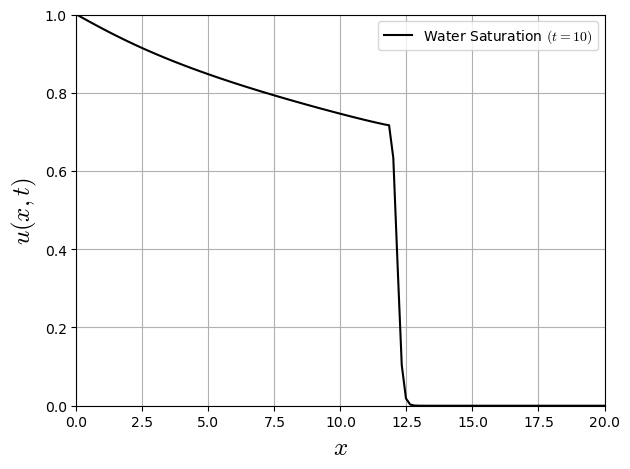

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
matplotlib.rcParams['mathtext.fontset'] = 'cm'
#***************************************InputParameters************************************************
Nx=126 #Square Domain Length
#***************************************Lattice-Properties-D1Q5*************************************************
cs=1.0/sqrt(3.0);
w = np.array([4.0/6.0, 1.0/6.0, 1.0/6.0],dtype="float64")
cx = np.array([0, 1, -1],dtype="int16")  
L = 20.0            # Length of the reservoir
T = 10.0             # Total simulation time
dx = L / (Nx-1)       # Spatial step size
c=2**(2)            # c=dx/dt
dt=dx/c             # Time step size
nt = int(T / dt)    # Time step number
uo=1.0              # Constant Fluid Flux
m=1.0               # Dynamic Viscosity ration
print('dx=',dx,'\t dt=',dt)
#***************************************LBM-Scale************************************************
ue=uo/c
sk=np.zeros((Nx),dtype="float64")
Bx=np.zeros((Nx),dtype="float64")
f=np.zeros((3,Nx),dtype="float64")
for k in range(0,3):
    f[k,:]=w[k]*(sk[:]+cx[k]*Bx[:]*3.0)
for t in range(nt):
    #----------------------Macro------------------
    sk[:]=f[0,:]+f[1,:]+f[2,:]
    Bx=ue*sk*sk/(sk*sk+(1.0-sk)**(2.0))
    #--------------------Collision----------------
    for k in range(0,3):
        f[k,:]=w[k]*(sk[:]+cx[k]*Bx[:]/cs**2)
    #-----------------streaming-------------------
    for k in range(0,3):
        f[k,:]=np.roll(f[k,:], cx[k], axis=0)
    #-----------------Boundaries-----------------------
    f[1,0]= 1.0 - f[0,0]-f[2,0]
    f[0,Nx-1]=f[0,Nx-2]
    f[1,Nx-1]=f[1,Nx-2]
    f[2,Nx-1]=f[2,Nx-2]
x = np.linspace(0, L, Nx)
plt.plot(x, sk, 'k-' ,label='Water Saturation $(t=10)$')
plt.xlabel(r"$x$",fontsize=18)
plt.ylabel(r"$u(x,t)$",fontsize=18)
plt.xlim(0,20)
plt.ylim(0,1)
plt.legend()
plt.grid(True)
plt.tight_layout()

#### FDM approach of LBM Framework D1Q3:

```{toggle}

```python
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
matplotlib.rcParams['mathtext.fontset'] = 'cm'
#----------------------------Simulation-Set--------------------------------------------------------
Nx=500;
L = 20.0            # Length of the reservoir
T = 10.0             # Total simulation time
dx = L / (Nx)       # Spatial step size
c=2**(2)            # c=dx/dt
dt=dx/c             # Time step size
nt = int(T / dt)    # Time step number
uo=1.0              # Constant Fluid Flux
m=1.0               # Dynamic Viscosity ration
print('dx=',dx,'\t dt=',dt)
#----------------------------Initilizing-Simulation------------------------------------------------
sf=np.zeros((Nx),dtype="float64")  # Allocating Density Field
sfo=np.zeros((Nx),dtype="float64") # Allocating Density Buffer Field
sf[:]=0.0                          # Initilal Density Condition
Bx=np.zeros((Nx),dtype="float64")             # Allocating Convective Term
Bx=uo*sf**(2.0)/(sf**(2.0)+m*(1.0-sf)**(2.0)) # Initializing Convective Term
for t in range(nt):
# for t in range(3):
    sf=sfo
    Bx=uo*sf**(2.0)/(sf**(2.0)+m*(1.0-sf)**(2.0))
    sfo = ( (4.0*sf/6.0 + np.roll(sf, cx[1], axis=0)/6.0 + np.roll(sf, cx[2], axis=0)/6.0) 
           + dt/dx * (np.roll(Bx, cx[1], axis=0) - np.roll(Bx, cx[2], axis=0))/2.0 )
    sfo[0] = 1.0     # Inlet boundary condition
    sfo[Nx-1] = 0.0  # Inlet boundary condition
x = np.linspace(0, L, Nx)
plt.plot(x, sk, 'k-' ,label='Water Saturation $(t=10)$')
plt.xlabel(r"$x$",fontsize=18)
plt.ylabel(r"$u(x,t)$",fontsize=18)
plt.xlim(0,20)
plt.ylim(0,1)
plt.legend()
plt.grid(True)
plt.tight_layout()
```

dx= 0.16 	 dt= 0.04


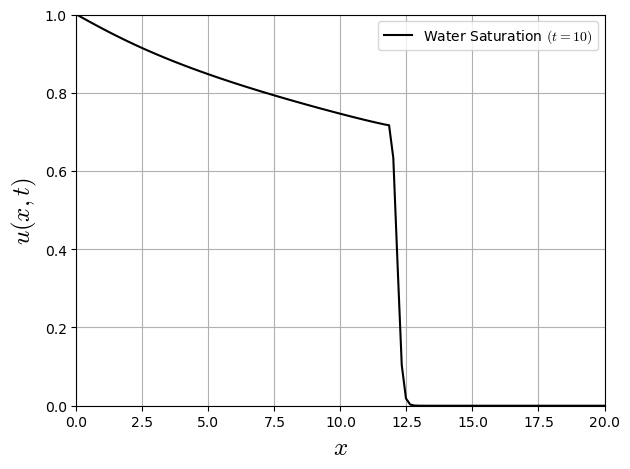

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
matplotlib.rcParams['mathtext.fontset'] = 'cm'
#----------------------------Simulation-Set--------------------------------------------------------
Nx=126;
L = 20.0            # Length of the reservoir
T = 10.0             # Total simulation time
dx = L / (Nx-1)       # Spatial step size
c=2**(2)            # c=dx/dt
dt=dx/c             # Time step size
nt = int(T / dt)    # Time step number
uo=1.0              # Constant Fluid Flux
m=1.0               # Dynamic Viscosity ration
print('dx=',dx,'\t dt=',dt)
#----------------------------Initilizing-Simulation------------------------------------------------
sf=np.zeros((Nx),dtype="float64")  # Allocating Density Field
sfo=np.zeros((Nx),dtype="float64") # Allocating Density Buffer Field
sf[:]=0.0                          # Initilal Density Condition
Bx=np.zeros((Nx),dtype="float64")             # Allocating Convective Term
Bx=uo*sf**(2.0)/(sf**(2.0)+m*(1.0-sf)**(2.0)) # Initializing Convective Term
for t in range(nt):
# for t in range(3):
    sf=sfo
    Bx=uo*sf**(2.0)/(sf**(2.0)+m*(1.0-sf)**(2.0))
    sfo = ( (4.0*sf/6.0 + np.roll(sf, cx[1], axis=0)/6.0 + np.roll(sf, cx[2], axis=0)/6.0) 
           + dt/dx * (np.roll(Bx, cx[1], axis=0) - np.roll(Bx, cx[2], axis=0))/2.0 )
    sfo[0] = 1.0     # Inlet boundary condition
    sfo[Nx-1] = 0.0  # Inlet boundary condition
x = np.linspace(0, L, Nx)
plt.plot(x, sk, 'k-' ,label='Water Saturation $(t=10)$')
plt.xlabel(r"$x$",fontsize=18)
plt.ylabel(r"$u(x,t)$",fontsize=18)
plt.xlim(0,20)
plt.ylim(0,1)
plt.legend()
plt.grid(True)
plt.tight_layout()

#### Numerical and Analytical Comparisson

```{toggle}

```python
plt.plot(x, sf, 'ks:' ,label='FDM (FTCS-SD): Water Saturation $(t=10)$',markersize=6,fillstyle="none")
plt.plot(x, sk, 'ro:' ,label='LBM D1Q3: Water Saturation $(t=10)$',markersize=6,fillstyle="none")
plt.xlabel(r"$x$",fontsize=18)
plt.ylabel(r"$u(x,t)$",fontsize=18)
plt.xlim(0,20)
plt.ylim(0,1)
plt.legend()
plt.grid(True)
plt.tight_layout()
```

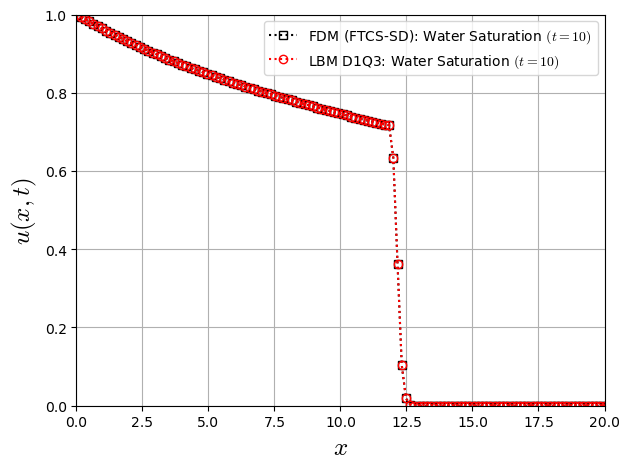

In [32]:
plt.plot(x, sf, 'ks:' ,label='FDM (FTCS-SD): Water Saturation $(t=10)$',markersize=6,fillstyle="none")
plt.plot(x, sk, 'ro:' ,label='LBM D1Q3: Water Saturation $(t=10)$',markersize=6,fillstyle="none")
plt.xlabel(r"$x$",fontsize=18)
plt.ylabel(r"$u(x,t)$",fontsize=18)
plt.xlim(0,20)
plt.ylim(0,1)
plt.legend()
plt.grid(True)
plt.tight_layout()

```{figure} sat-FTCS-SD.png
---
scale: 100%
align: center
name: sat-FTCS-SD
---
Comparisson of saturation profile for FDM and LBM FTCS-SD schemes.
```